<a href="https://colab.research.google.com/github/mandricic/CS5062/blob/master/etivity1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Etivity 1: Exploratory Data Analysis (EDA)**

This lab exercise demonstrates EDA of an Bank dataset with the Python modules Pandas, Numpy, Matplotib and Seaborn. 

# **A. Importing Modules and Dataset**

In [0]:
# The Python modules uses in this tutorial are:
# - Pandas
# - Numpy
# - Matplotlib
# - Seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **B. Load Bank file**

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/mandricic/CS5062/master/bank.csv')

# **QUESTION  to answer by exploring bank dataset**
**1.   What is most dependent on Client Subscription**<br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;a.) Number of calls VS Call duration<br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;b.) Can we have to much calls per client <br/>
**2. Is different age group more prone to subscribing** <br/>
**3. Would use of different contact type have any influance on Subscription**







# **C. Quick Data Exploration**

1. We will start with look at the first and the last 10 data rows with the dataframe methods head() and tail(), respectively.

In [3]:
# Print first 10 rows of the dataframe
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,tertiary,no,392,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39.0,technician,divorced,secondary,no,688,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59.0,retired,married,secondary,no,1035,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47.0,blue-collar,married,secondary,no,398,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54.0,retired,married,secondary,no,1004,yes,no,cellular,1,apr,479,1,307,1,failure,no
5,46.0,self-employed,divorced,tertiary,no,926,yes,no,cellular,1,apr,463,1,133,3,failure,no
6,34.0,blue-collar,married,secondary,no,1924,yes,yes,cellular,1,apr,161,2,253,1,failure,no
7,45.0,services,divorced,secondary,no,396,yes,yes,cellular,1,apr,251,4,329,4,failure,no
8,58.0,management,divorced,tertiary,no,315,yes,no,cellular,1,apr,121,2,135,2,failure,no
9,49.0,management,divorced,tertiary,no,20727,no,no,cellular,1,apr,285,3,132,2,failure,no


In [4]:
# Print lats 10 rows of the dataframe
df.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1990,36.0,technician,married,tertiary,no,376,no,no,cellular,16,sep,173,1,-1,0,NaN,yes
1991,39.0,admin.,divorced,secondary,no,112,no,no,cellular,16,sep,574,3,-1,0,NaN,yes
1992,78.0,retired,divorced,primary,no,527,no,no,cellular,16,sep,193,1,-1,0,NaN,yes
1993,35.0,management,married,NaN,no,2326,yes,yes,cellular,16,sep,319,1,-1,0,NaN,yes
1994,26.0,student,single,secondary,no,655,no,no,cellular,16,sep,190,1,-1,0,NaN,yes
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,secondary,no,127,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,primary,no,1154,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,primary,no,4343,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,secondary,no,6403,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


In [0]:
# Check how many records is in Dataset
df['subscribed'].count()

2000

# **C.1. Quick Examination of total records**
**Dataset has 2000 data rows.** <br/>
I used '**subscribed**' attribute for the count because, that attribute doesn’t have NULL value. <br/>
**Subscribed** attribute can be set to Yes or No. <br/>
This exercise is focusing to find out what can affect subscribed attribute to be set to yes. <br/>
To get answer to that, I will look mostly at Attributes **duration**,**campaign** and **Previous** <br/>





# **C.2. Quick Examination of Numerical Attributes**

In [0]:
df.describe()


,age,balance,day,duration,campaign,pdays,previous
count,1988.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,41.753018,1413.663500,13.851500,292.020500,1.909500,167.896000,2.561500
std,12.724358,3131.224213,9.712189,221.557295,1.378862,131.754126,3.400735
min,18.000000,-980.000000,1.000000,7.000000,1.000000,-1.000000,0.000000
25%,32.000000,201.500000,5.000000,146.000000,1.000000,75.750000,1.000000
50%,38.000000,551.000000,12.000000,236.000000,1.000000,182.000000,2.000000
75%,50.000000,1644.500000,23.000000,379.000000,2.000000,251.000000,3.000000
max,93.000000,81204.000000,31.000000,1823.000000,11.000000,854.000000,55.000000


**Age**- We have 2000 records in the Bank table, 12 values are missing <br/>
**pdays** - we can see that there are Clients that were not previously contacted (min = -1) <br/>
**campaign** is numeric attribute that contains number of calls to single Client for current campaign. Average time each Client was cantacted was 1.909<br/>
**previous** is numeric attribute that contains the number of calls performed to single client before current campaign. On previous campaign, average time of call was 2.5 per Client <br/>
**duration**  is numeric attribute that contains value for total duration of the calls per Client <br/> 
 


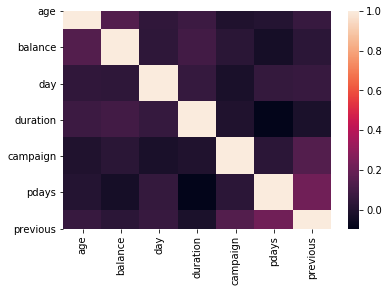

In [0]:
#correlation matrix
sns.heatmap(df.corr());

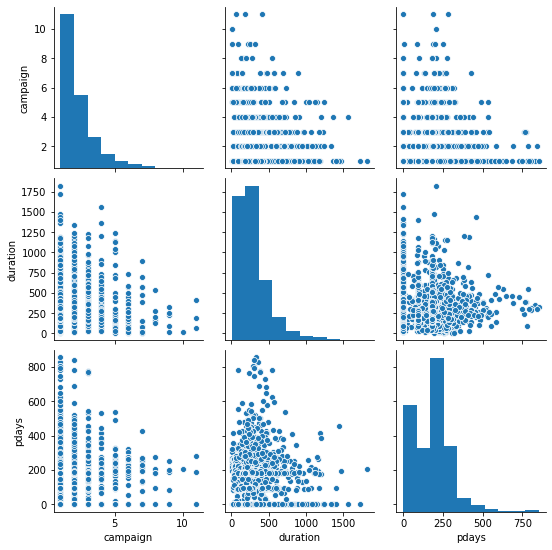

In [5]:
# by using method dropna() we will remove all rows with missing values 
sns.pairplot(data=df[['campaign','duration','pdays']].dropna())
plt.show()

# **C.3. Quick Examination of Categorical Attributes**
For the categorical (non-numerical) attributes i will look at Attributes which I will use in my examination <br/>
**contact** - this attribute contains communication type which can be 'cellular' or 'telephone'<br/>
**subscribed** - this attribute displays value "yes" or "no" - represents if clients has subscribet or not <br/>
**poutcome** - this attribute displays outcome of the previous marketing campaign: 'failure','nonexistent','success'

In [7]:
df['contact'].value_counts()

cellular     1663
telephone     146
Name: contact, dtype: int64

In [25]:
df['poutcome'].value_counts()

failure    955
success    444
other      147
Name: poutcome, dtype: int64

In [8]:
df['subscribed'].value_counts()

yes    1000
no     1000
Name: subscribed, dtype: int64

**cellular** is used as main contact device<br/>
we can notice that result for prevous campaign is not very good, as we have under **poutcome** 955 results for failure<br/>
there is equal amoutn of people that is **subscribed** and that are not  


# **D. Distribution Analysis for Numerical Atributes** 

For Numerical values, I will look into the numerical attributes previous and campaign.

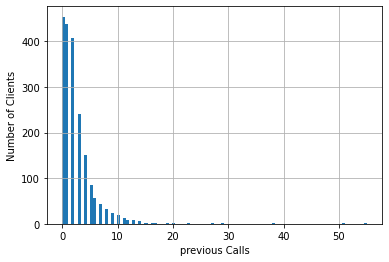

In [20]:
# Let's start by plotting a histogram of ApplicantIncome using the command:

df['previous'].hist(bins=100)
plt.xlabel('previous Calls')
plt.ylabel('Number of Clients')
plt.show()

In the histogram above, we can see that there is the highest number of Clients that previously didnt receive any call. <br/>
There is high enough number of clients that received one call, and just little bit less of clients that received 2 calls.<br/>
After that we can see drop in the amount off calls - there is just around 250 Clients that received 3 calls, just around 150 Clients that received 4 calls and so on.<br/>
Interesting part is that some clients received more then 50 calls, which sounds a bit to much.

By looking into boxp lots we can see the distribution better.

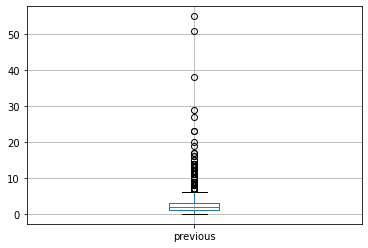

In [21]:
df.boxplot(column='previous')
plt.show()

The box plot above confirms that there is less client that received many calls

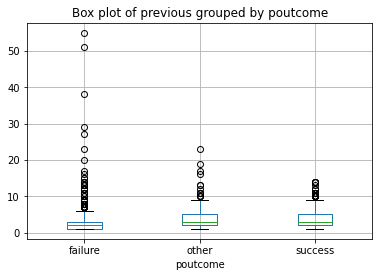

In [27]:
# Boxp lots of previous, grouped by the categorical attribute poutcome
df.boxplot(column='previous', by='poutcome')
plt.title('Box plot of previous grouped by poutcome')
plt.suptitle("") # get rid of the automatic 'Box plot grouped by group_by_column_name' title
plt.show()

By looking at boxplot above, we can see that less call result in success.

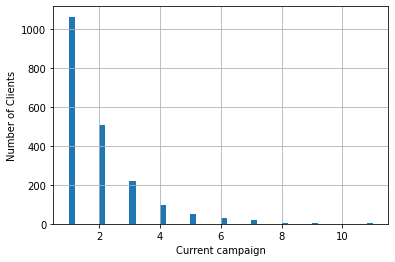

In [33]:
# Now we can look at current campaign

df['campaign'].hist(bins=50)
plt.xlabel('Current campaign')
plt.ylabel('Number of Clients')
plt.show()

In the histogram above, we can see that there is the highest number of Clients that received 1 call - more than 1000.
There is arround 450 Clients that received 2 calls.
There is very small amount of Clients that received more then 5 calls


By looking into boxp lots we can see the distribution better.

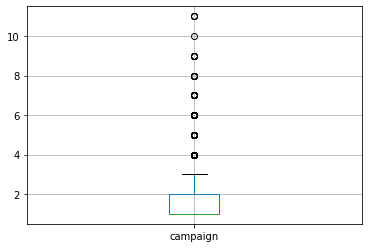

In [34]:
df.boxplot(column='campaign')
plt.show()

The box plot above confirms that under current campaign, the most clients were contacted 1-2 times

Now I can compare Prevous Attribute with Campaign Attribute


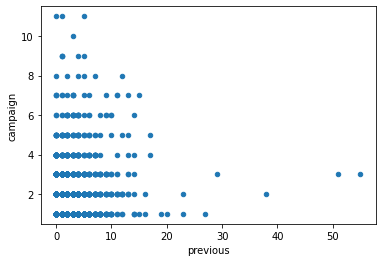

In [35]:
df.plot.scatter(x='previous', y='campaign')
plt.show()

From this scatter plot we can see that there are much more calls made per single user under previous calls, then what is made under current campaign. This is as expected, because previous calls contains number of several previous campaigns.  <br/>
In both attributes we can notice that there is much more clients who got less amount of calls .

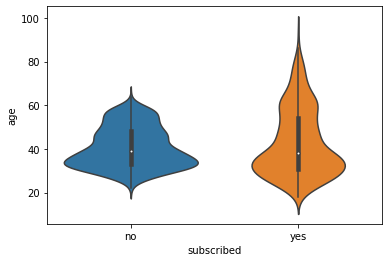

In [0]:
sns.violinplot(data=df, x='subscribed', y='age')
plt.show()

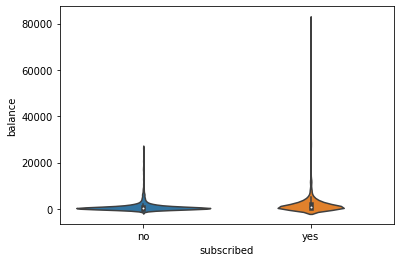

In [0]:
sns.violinplot(data=df, x='subscribed', y='balance')
plt.show()

We can see that **clients** **over 65 and under 20** are all **subscribed**

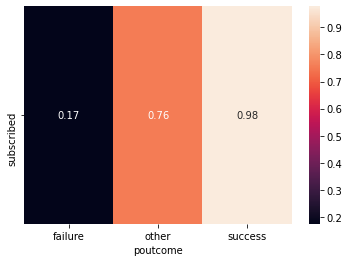

In [0]:
pivot_table_LCG = df.pivot_table(values='subscribed',  
                           columns='poutcome',
                           aggfunc=lambda x: x.map({'yes':1, 'no':0}).mean())
sns.heatmap(pivot_table_LCG, annot=True)
plt.show()

If we look at outcome from previous campaign and for effect they have on subscription. We can see that if poucome was set to success, there is 98% chance that client will be subscribed. Where for poucome with status failure there is big chance that subscribed will be negative.

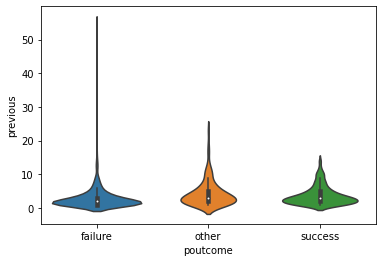

In [0]:
sns.violinplot(data=df, x='poutcome', y='previous')
plt.show()

plot above it shows that success was acchiwed when calls were not made more then 18 times.

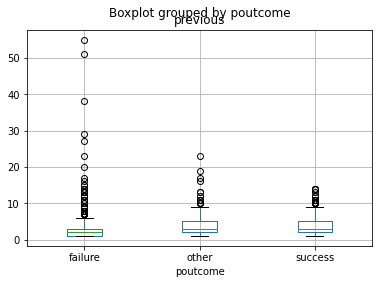

In [0]:
df.boxplot(column='previous', by='poutcome') 
plt.show()

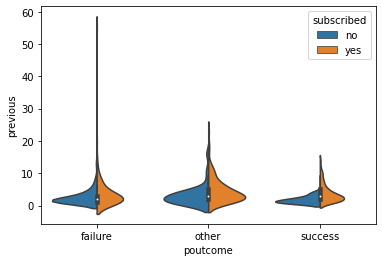

In [0]:
sns.violinplot(data=df, x='poutcome', y='previous', hue='subscribed', split=True)
plt.show()

violinplot shows that duration of the call affects subscription status- longer calls will get more subscriptions, and this would be the same for cellulars and for the telephones

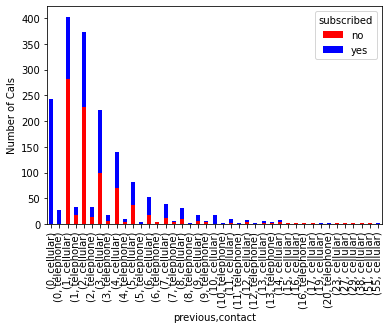

In [0]:
 

crosstab_CGL = pd.crosstab([df['previous'], df['contact']], df['subscribed'])
crosstab_CGL.plot(kind='bar', stacked=True, color=['red', 'blue'], grid=False)
plt.ylabel('Number of Cals')
plt.show()

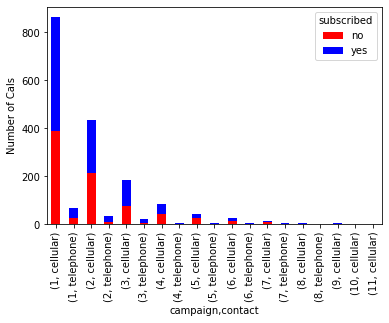

In [0]:
crosstab_CGL = pd.crosstab([df['campaign'], df['contact']], df['subscribed'])
crosstab_CGL.plot(kind='bar', stacked=True, color=['red', 'blue'], grid=False)
plt.ylabel('Number of Cals')
plt.show()

Both crosstab abowe are showing that there is no difference if cellular or telephone was used.
In most casses subscription was set to yes after one call

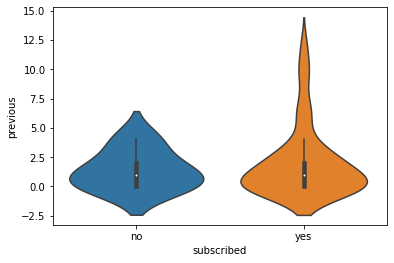

In [0]:
sns.violinplot(data=df.loc[df['age'] <= 25], x='subscribed', y='previous' )
plt.show() 